# 1.Importing related libraries

In [2]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


# 2.Importing Dataset

In [3]:
# Step 1 : Read Data
train_df = pd.read_csv('C:/my file/Collage/Semester 9/MAchine LEarning/dataset titanic/4/train.csv')
test_df = pd.read_csv('C:/my file/Collage/Semester 9/MAchine LEarning/dataset titanic/4/test.csv')
combine = [train_df, test_df]

In [4]:
# Step 2 : View Data
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [5]:
# Step 2 : Menampilkan 5 baris data pertama
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Step 2 : Menampilkan 5 baris data terakhir
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# Step 2 : Menampilkan informasi data
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [8]:
# Step 2 : Menampilkan informasi data dalam bentuk statistik
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Step 2 : Menampilkan informasi data dalam bentuk karakter
train_df.describe(include=['O'])


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [11]:
# Step 3 : Periksa probabilitas kelangsungan hidup yang sesuai dengan setiap fitur berdasarkan statistik.
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
# Step 3 : Probabilitas kelangsungan hidup dapat langsung ditentukan oleh jumlah saudara kandung.
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [13]:
# Step 3 : Probabilitas kelangsungan hidup dapat langsung ditentukan oleh gender.
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


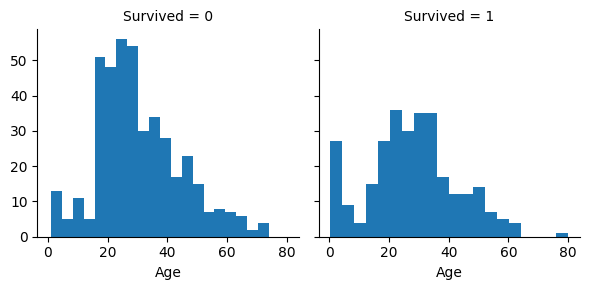

In [14]:
# Step 3 : Menampilkan data dalam bentuk grafik berdasarkan umur
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

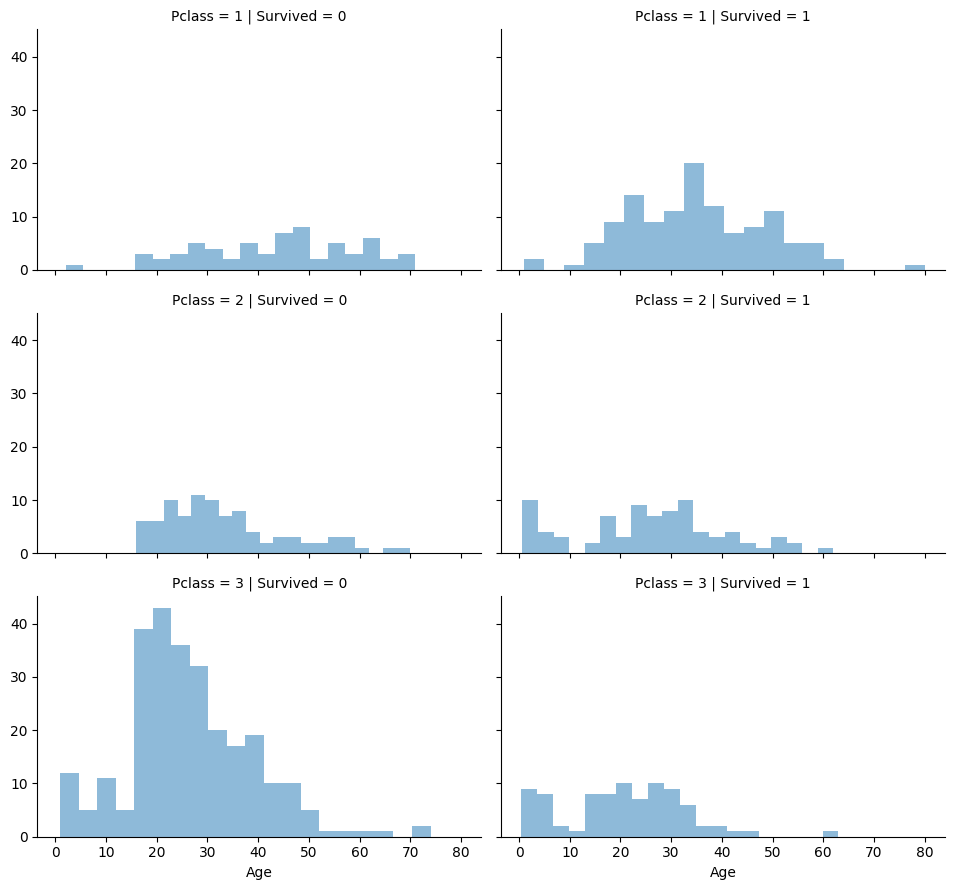

In [16]:
# Step 3 : Menampilkan data dalam bentuk grafik berdasarkan kelas dan umur
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

# 3.Preprocessing Data

In [18]:
# Step 1 : Combine the datasets
data=pd.concat([train_df,test_df],ignore_index=True)

In [19]:
# Step 2 : Check for missing values.
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [20]:
# Step 3 : Fill the missing values with data ( parameter : fare, embarked )
data['Embarked'].fillna(str(data['Embarked'].mode()[0]),inplace=True)
data['Fare'].fillna(int(data['Fare'].mode()[0]),inplace=True)

In [21]:
# Step 3 : Fill the missing values with data ( parameter : average age )
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [22]:
# Step 3 : Hapus data yang kurang signifikan. Sebelum ini, tetapkan nilai ke Target terlebih dahulu.
Target=data['Survived']
data=data.drop(['Cabin','Name','Ticket','Survived'],axis=1)

In [23]:
# Step 3 : Periksa apakah nilai yang hilang masih ada.
data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [24]:
# Step 4 : Convert data
data['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [25]:
# Step 4 : Gunakan fungsi pencarian untuk mendapatkan setiap nilai tipe karakter dan menggantinya dengan nilai tipe numerik.
data['Sex']=data['Sex'].replace(['male','female'],[0,1])
data['Embarked']=data['Embarked'].replace(['S','C','Q'],[0,1,2])

In [26]:
# Step 4 : test.csv tidak dapat digunakan sebagai set tes pelatihan karena tidak mengandung Target. train.csv berisi 891 buah data (dengan Target), yang perlu diekstraksi.
X=data[:891]
y=Target[:891]

# 4. Building Model

In [27]:
# Step 1 : Split the dataset
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,y)

In [28]:
# Step 2 : Train a model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
model=LogisticRegression()
model.fit(X,y)
print('logR',model.score(X,y))
model=RandomForestClassifier()
model.fit(X,y)
print('RFC',model.score(X,y))
model=ensemble.AdaBoostClassifier()
model.fit(X,y)
print('AdaBoost',model.score(X,y))

c:\my file\anaconda3\envs\tf-gpu-2.10\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


logR 0.8035914702581369
RFC 1.0
AdaBoost 0.8294051627384961


In [29]:
# Step 3 : Predict the model
model.predict(data[891:])

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.